In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
os.chdir('/content/drive/MyDrive/9조 프로젝트/Data/Dataset')

In [2]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/9조 프로젝트/Data/final_dataset/train_df_box_roi.csv')
val_df = pd.read_csv('/content/drive/MyDrive/9조 프로젝트/Data/final_dataset/val_df_box_roi.csv')
test_df = pd.read_csv('/content/drive/MyDrive/9조 프로젝트/Data/final_dataset/test_df_box_roi.csv')

In [ ]:
dataset = pd.concat([train_df, val_df])
dataset = dataset.reset_index()
dataset = dataset.drop('index', axis=1)
dataset['label'] = dataset['label'] + 2
dataset

,id,ImageID,height,width,label,x1,y1,x2,y2
0,5401,064386a33451ee9ed5c7a5e7af248a32dd3b45eefc788e...,640,640,2,24.0,11.0,632.5,443.5
1,5402,730f9be39bb6236eb6e19e161f8a14f0ccbe0d4c34b749...,640,640,2,42.0,117.0,621.0,587.0
2,5403,9e1a89f95f37d6d77620c3fd9ec30de2aad7d7a0e15a37...,640,640,2,18.0,190.0,632.0,474.0
3,5404,3c8e3e8bfcc500911b0d5a4924382ae05c56ebfd6e597c...,640,640,2,77.0,144.0,560.0,483.0
4,5405,ea402346e9cc8cc0b20e9cf4afa5b72a9045d43efd6460...,640,640,2,58.0,18.0,621.0,573.0
...,...,...,...,...,...,...,...,...,...
31387,10651,61JBu6AfX7L-_AC_SX425__jpg.rf.d09ec9ee704479dc...,640,640,9,294.0,499.0,491.5,640.0
31388,10651,61JBu6AfX7L-_AC_SX425__jpg.rf.d09ec9ee704479dc...,640,640,9,442.0,496.0,640.0,640.0
31389,10652,71N-SFh0BML-_AC_SX425__jpg.rf.f842e78f042d352f...,640,640,9,336.0,15.0,640.0,205.0
31390,10653,51h7kqbkRBS-_AC_SX425__jpg.rf.b95815479e551591...,640,640,9,87.0,169.0,536.0,414.0


In [ ]:
from PIL import Image

image_lst = []
for i in range(len(train_df)) :
  image_lst.append(Image.open('train/data/' + dataset['ImageID'][i]).convert('RGB'))
  print(i) # 20872

for i in range(20872, len(dataset)) :
  image_lst.append(Image.open('val/data/' + dataset['ImageID'][i]).convert('RGB'))
  print(i) # 31392

Streaming output truncated to the last 5000 lines.
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661

In [ ]:
test_image_lst = []
for i in range(len(test_df)) :
  test_image_lst.append(Image.open('test/data/' + test_df['ImageID'][i]).convert('RGB'))
  print(i) # 1943

NameError: ignored

In [ ]:
from datasets.dataset_dict import DatasetDict
from datasets import Dataset

d = {'train':Dataset.from_dict({'img_file_path' : dataset['ImageID'], 'image' : image_lst, 'label' : dataset['label']}),
     'test':Dataset.from_dict({'img_file_path' : test_df['ImageID'], 'image' : test_image_lst, 'label' :test_df['label']})
     }

dataset_dict = DatasetDict(d)

In [ ]:
dataset_dict = dataset_dict.class_encode_column("label")

Casting to class labels:   0%|          | 0/15493 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/1943 [00:00<?, ? examples/s]

In [ ]:
import pickle
from datasets import load_dataset, DatasetDict

# DatasetDict 저장
with open("/content/drive/MyDrive/Personal Colab/민지/final_dataset_dict.pkl", "wb") as f:
    pickle.dump(dataset_dict, f)

In [ ]:
import pickle
from datasets import load_dataset, DatasetDict
from datasets.dataset_dict import DatasetDict
from datasets import Dataset

# 저장된 DatasetDict 로드
with open("/content/drive/MyDrive/Personal Colab/민지/final_dataset_dict.pkl", "rb") as f:
    dataset_dict = pickle.load(f)

# 로드된 DatasetDict 사용
print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['img_file_path', 'image', 'label'],
        num_rows: 15493
    })
    test: Dataset({
        features: ['img_file_path', 'image', 'label'],
        num_rows: 1943
    })
})


In [ ]:
# DatasetDict를 Arrow 파일로 저장
dataset_dict.save_to_disk("my-arrow-datasets")

Saving the dataset (0/10 shards):   0%|          | 0/15493 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/1943 [00:00<?, ? examples/s]

In [ ]:
# Arrow 파일에서 로드
from datasets import load_from_disk

arrow_datasets_reloaded = load_from_disk("my-arrow-datasets")

arrow_datasets_reloaded 와 val_df를 합쳐 arrow_dataset_dict 만듦

In [ ]:
from datasets.dataset_dict import DatasetDict
from datasets import Dataset

d = {'train1':Dataset.from_dict({'img_file_path' : val_df['ImageID'], 'image' : image_lst, 'label' : val_df['category']})
     } # image_lst는 val만 담은 list

dataset_dict1 = DatasetDict(d)

dataset_dict1 = dataset_dict1.class_encode_column("label")

from datasets import concatenate_datasets, load_dataset
train_concat = concatenate_datasets([arrow_datasets_reloaded['train'], dataset_dict1['train1']])

In [ ]:
from datasets.dataset_dict import DatasetDict
from datasets import Dataset

combined_dataset_dict = DatasetDict({
    'train': train_concat,
    'test': arrow_datasets_reloaded['test']
})

In [ ]:
# DatasetDict를 Arrow 파일로 저장
from datasets import load_from_disk

combined_dataset_dict.save_to_disk("arrow_dataset_dict")



---



---



In [6]:
from datasets import load_from_disk

dataset_dict = load_from_disk("my-arrow-datasets")

In [7]:
from transformers import AutoFeatureExtractor, AutoModel

model_ckpt = "google/vit-base-patch16-224-in21k"
#model_ckpt = "nateraw/vit-base-beans"
extractor = AutoFeatureExtractor.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)
hidden_dim = model.config.hidden_size

In [8]:
subset = dataset_dict['train']

In [9]:
labels = dataset_dict["train"].features["label"].names
label2id, id2label = dict(), dict() # label : index / index : label

for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

In [10]:
import torchvision.transforms as T


# Data transformation chain.
transformation_chain = T.Compose(
    [
        # We first resize the input image to 256x256 and then we take center crop.
        T.Resize((224, 224)),
        #T.Resize(int((256 / 224) * extractor.size["height"])),
        #T.CenterCrop(extractor.size["height"]),
        T.ToTensor(),
        T.Normalize(mean=extractor.image_mean, std=extractor.image_std),
    ]
)

In [11]:
import torch

def extract_embeddings(model: torch.nn.Module):
    """Utility to compute embeddings."""
    device = model.device

    def pp(batch):
        images = batch["image"]
        # `transformation_chain` is a compostion of preprocessing
        # transformations we apply to the input images to prepare them
        # for the model. For more details, check out the accompanying Colab Notebook.
        image_batch_transformed = torch.stack(
            [transformation_chain(image) for image in images]
        )
        new_batch = {"pixel_values": image_batch_transformed.to(device)}
        with torch.no_grad():
            embeddings = model(**new_batch).last_hidden_state[:, 0].cpu()  # 임베딩 계산
        return {"embeddings": embeddings}

    return pp

In [13]:
batch_size = 1024
device = "cuda" if torch.cuda.is_available() else "cpu"
extract_fn = extract_embeddings(model.to(device))
subset_emb = subset.map(extract_fn, batched=True, batch_size = 1024)
#subset_emb = subset.map(extract_fn, batched=True, batch_size=128) # 임베딩 계산

Map:   0%|          | 0/15493 [00:00<?, ? examples/s]

KeyboardInterrupt: ignored

In [ ]:
subset_emb

Dataset({
    features: ['img_file_path', 'image', 'label', 'embeddings'],
    num_rows: 15493
})

In [ ]:
from tqdm.auto import tqdm

candidate_ids = []

for id in tqdm(range(len(subset_emb))):
    label = subset_emb[id]["label"]

    # Create a unique indentifier.
    entry = str(id) + "_" + str(label)

    candidate_ids.append(entry)  # idx _ label

  0%|          | 0/15493 [00:00<?, ?it/s]

In [ ]:
import numpy as np

all_candidate_embeddings = np.array(subset_emb["embeddings"])
all_candidate_embeddings = torch.from_numpy(all_candidate_embeddings) # tensor

In [ ]:
all_candidate_embeddings.size()

torch.Size([15493, 768])

In [ ]:
def compute_scores(emb_one, emb_two):
    """Computes cosine similarity between two vectors."""
    scores = torch.nn.functional.cosine_similarity(emb_one, emb_two)
    return scores.numpy().tolist()


def fetch_similar(image, top_k=5):
    """Fetches the `top_k` similar images with `image` as the query."""
    # Prepare the input query image for embedding computation.
    image_transformed = transformation_chain(image).unsqueeze(0)
    new_batch = {"pixel_values": image_transformed.to(device)}

    # Comute the embedding.
    with torch.no_grad():
        query_embeddings = model(**new_batch).last_hidden_state[:, 0].cpu()

    # Compute similarity scores with all the candidate images at one go.
    # We also create a mapping between the candidate image identifiers
    # and their similarity scores with the query image.
    sim_scores = compute_scores(all_candidate_embeddings, query_embeddings) # train vs test(query)
    similarity_mapping = dict(zip(candidate_ids, sim_scores))

    # Sort the mapping dictionary and return `top_k` candidates.
    similarity_mapping_sorted = dict(
        sorted(similarity_mapping.items(), key=lambda x: x[1], reverse=True)  # sim_scores로 내림차순
    )
    id_entries = list(similarity_mapping_sorted.keys())[:top_k]

    ids = list(map(lambda x: int(x.split("_")[0]), id_entries))
    labels = list(map(lambda x: int(x.split("_")[-1]), id_entries))
    return ids, labels

In [ ]:
test_idx = np.random.choice(len(dataset_dict["test"]))
test_sample = dataset_dict["test"][test_idx]["image"]
test_label = dataset_dict["test"][test_idx]["label"]

sim_ids, sim_labels = fetch_similar(test_sample)
print(f"Query label: {test_label}")
print(f"Top 5 candidate labels: {sim_labels}")

Query label: 7
Top 5 candidate labels: [7, 7, 7, 7, 7]


In [ ]:
test_idx

1866

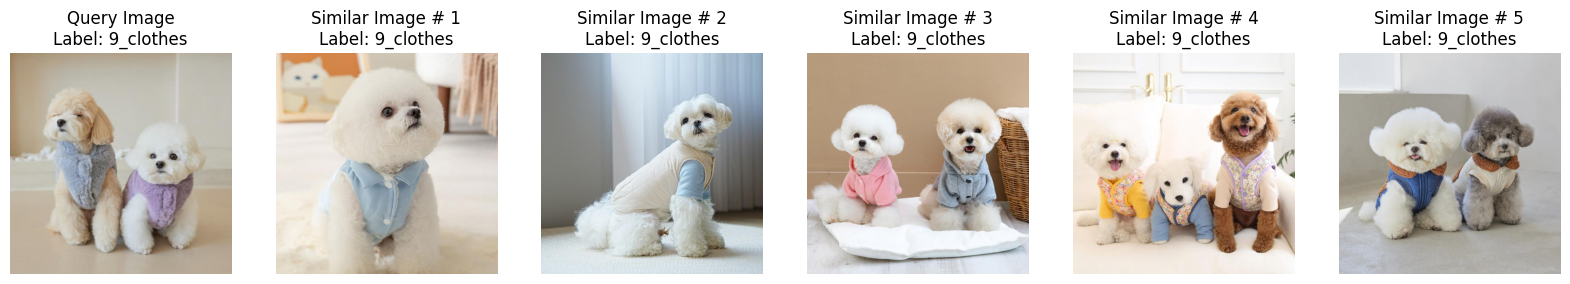

In [ ]:
import matplotlib.pyplot as plt


def plot_images(images, labels):
    if not isinstance(labels, list):
        labels = labels.tolist()

    plt.figure(figsize=(20, 10))
    columns = 6
    for (i, image) in enumerate(images):
        label_id = int(labels[i])
        ax = plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        if i == 0:
            ax.set_title("Query Image\n" + "Label: {}".format(id2label[label_id]))
        else:
            ax.set_title(
                "Similar Image # " + str(i) + "\nLabel: {}".format(id2label[label_id])
            )
        plt.imshow(np.array(image).astype("int"))
        plt.axis("off")


images = []
labels = []

for id, label in zip(sim_ids, sim_labels):
    images.append(subset_emb[id]["image"])
    labels.append(subset_emb[id]["label"])

images.insert(0, test_sample)
labels.insert(0, test_label)
plot_images(images, labels)